# LINEAR VS RIDGE VS LASSO REGRESSION

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y =make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

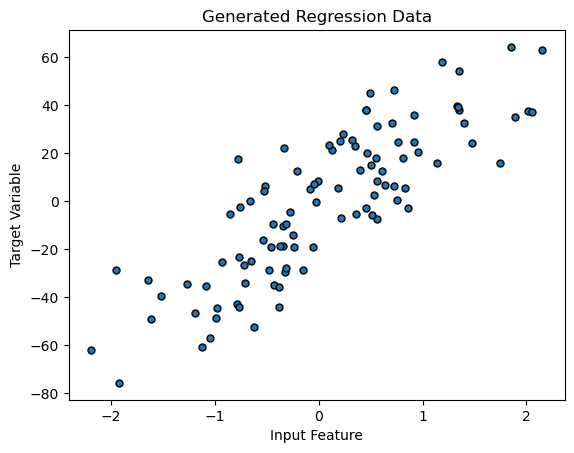

In [3]:
plt.scatter(X, y, marker='o', s=25, edgecolor='k')
plt.title("Generated Regression Data")
plt.xlabel("Input Feature")
plt.ylabel("Target Variable")
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr= LinearRegression()
lr.fit(X,y)
print('Coefficent in Linear Regression :-->', lr.coef_)
print('Intercept in Linear Regression :-->', lr.intercept_)

Coefficent in Linear Regression :--> [27.82809103]
Intercept in Linear Regression :--> -2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print('Coefficent in Ridge Regression :-->', rr.coef_)
print('Intercept in Ridge Regression :-->', rr.intercept_)

Coefficent in Ridge Regression :--> [24.9546267]
Intercept in Ridge Regression :--> -2.1269130035235726


# On increasing the value of alpha 

In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print('Coefficent in Ridge Regression :-->', rr.coef_)
print('Intercept in Ridge Regression :-->', rr.intercept_)

Coefficent in Ridge Regression :--> [24.9546267]
Intercept in Ridge Regression :--> -2.1269130035235726


# Increasing the alpha in ridge regression doesn't necessarily reduce coefficient values to zero, but it consistently mitigates their magnitudes. Ridge regression is primarily employed to curb overfitting rather than inducing variable elimination.

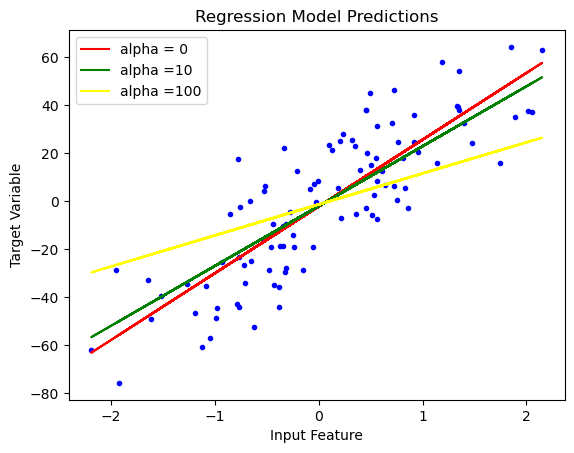

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color ='red', label='alpha = 0')
plt.plot(X,rr.predict(X),color ='green', label='alpha =10')
plt.plot(X,rr1.predict(X),color ='yellow', label='alpha =100')
plt.legend()
plt.title("Regression Model Predictions")
plt.xlabel("Input Feature")
plt.ylabel("Target Variable")
plt.show()

# In the graphical representation, when alpha is 0, indicating linear regression, the steeper slope suggests a model with higher complexity, possibly leading to overfitting. As we introduce ridge regression with alpha = 10, the slope decreases, reflecting a reduction in overfitting. However, caution is required as setting alpha too high, like alpha = 100, may lead to underfitting, where the model oversimplifies and fails to capture the underlying patterns in the data. The key lies in finding an alpha value that strikes a balance, preventing overfitting without pushing the model into underfitting territory.

# LASSO REGRESSION

In [10]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Coefficent in Linear Regression :--> [27.39869876]
Intercept in Linear Regression :--> -0.633835234100844


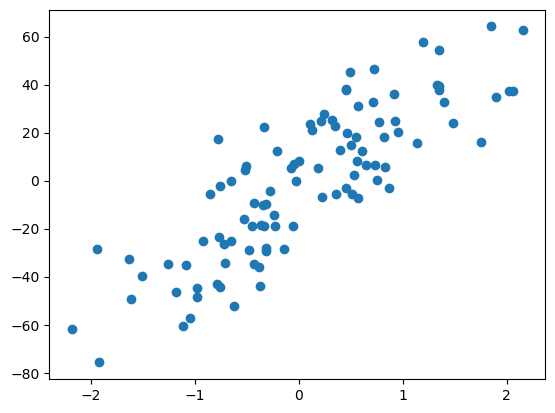

In [11]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20, random_state=13)

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)

reg = LinearRegression()
reg.fit(X_train,y_train)
print('Coefficent in Linear Regression :-->', reg.coef_)
print('Intercept in Linear Regression :-->', reg.intercept_)

C:\Users\sanya\anaconda3\Lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\sanya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sanya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+04, tolerance: 7.965e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

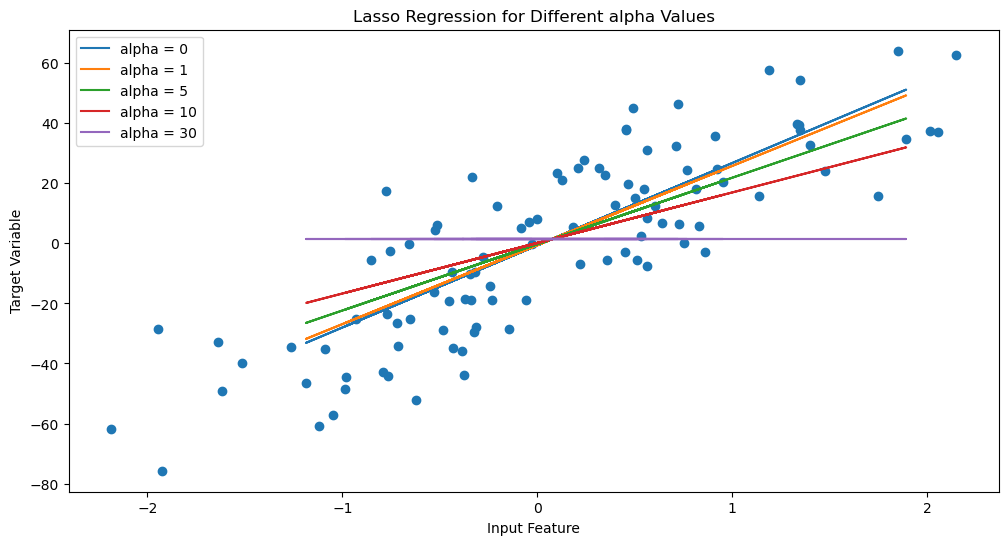

In [12]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L= Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label= 'alpha = {}'.format(i))
    
plt.legend()
plt.title("Lasso Regression for Different alpha Values")
plt.xlabel("Input Feature")
plt.ylabel("Target Variable")
plt.show()

 In Lasso regression, the regularization term is controlled by the hyperparameter alpha. When alpha is set to 0, Lasso regression is equivalent to linear regression, as there is no penalty for the magnitude of coefficients. Therefore, the model is free to fit the data with any slope and intercept, much like a standard linear regression model.

As you increase the value of alpha in Lasso regression, the penalty for the absolute values of the coefficients becomes more pronounced. This has the effect of shrinking the coefficients towards zero. Consequently, as alpha increases, the slope of the line fit by the Lasso regression tends to decrease, and eventually, the coefficients may become exactly zero.

When alpha is set to a very high value, like 30 in your case, the penalty for non-zero coefficients is so severe that the model effectively becomes too constrained. In such a scenario, the Lasso regression might produce a nearly horizontal line, suggesting that the model is mainly relying on the intercept term and not considering the input features significantly. This situation is indicative of underfitting, where the model is oversimplified and fails to capture the complexity of the underlying data.

In summary, as alpha increases in Lasso regression, the model tends to shrink coefficients towards zero, and a very high alpha may lead to underfitting, where the model becomes overly simplistic and ignores the input features.







# The key distinctions between Lasso (L1 regularization) and Ridge (L2 regularization) regression quite well. Here's a more detailed explanation:

Ridge Regression


In Ridge regression, the regularization term is proportional to the square of the magnitude of the coefficients. As the regularization parameter (alpha) increases, the penalty on the coefficients also increases. Ridge regression tends to shrink the coefficients towards zero but not exactly to zero.

The effect of Ridge regularization on the coefficients is such that even less relevant features still contribute to the model, albeit with smaller weights. Ridge regression is effective in preventing multicollinearity (high correlation among features) and reducing the impact of outliers. It helps to address overfitting by controlling the magnitude of the coefficients but does not lead to sparse solutions (i.e., setting coefficients exactly to zero).

Lasso Regression:


In contrast, Lasso regression employs L1 regularization, which adds a penalty term proportional to the absolute values of the coefficients. As the regularization parameter increases in Lasso, less relevant features may have their coefficients exactly reduced to zero.

Lasso has a built-in feature selection property, making it useful when dealing with datasets with many features, as it can automatically choose a subset of features that are most relevant to predicting the target variable. This makes Lasso regression a valuable tool for both regression and feature selection.

Summary:


Ridge Regression:

Controls the magnitude of coefficients, preventing them from becoming too large. Helps with multicollinearity and mitigates overfitting, but rarely leads to exactly zero coefficients.

Lasso Regression:

Emphasizes sparsity in the solution by driving some coefficients exactly to zero. Acts as a feature selector, making it useful when dealing with datasets with many features. Can help prevent overfitting and deal with irrelevant features more effectively than Ridge regression.



In practice, the choice between Ridge and Lasso depends on the specific characteristics of the dataset and the goals of the modeling task. If feature selection is crucial, Lasso might be preferred; otherwise, Ridge might be more appropriate. Additionally, Elastic Net regression combines both L1 and L2 regularization, providing a balance between the two approaches.